<a href="https://colab.research.google.com/github/ElizaLo/ML-using-Jupiter-Notebook-and-Google-Colab/blob/master/Text%20Generator/Text_Generator%20(GPU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Neural Network for generating text based on training txt file**

In [1]:
import os
import sys
import keras
import numpy as np
import string

Using TensorFlow backend.


In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir("drive/My Drive/ML Practice/Text Generator")

##  List of chars to be treated as separate tokens in the dictionary

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
chars = string.punctuation

In [0]:
chars = chars.replace("`", "")

In [0]:
chars = chars.replace("'", "")

In [0]:
f = open("alice_in_wonderland.txt")
alice = f.read()
f.close()

In [10]:
len(alice)

148574

## Replace ' and  `

In [0]:
alice = alice.replace(" '", '"')
alice = alice.replace("' ", '"')
alice = alice.replace(" `", '"')
alice = alice.replace("` ", '"')

In [12]:
alice[:1500]

'Alice\'s Adventures in Wonderland\n\n                ALICE\'S ADVENTURES IN WONDERLAND\n\n                          Lewis Carroll\n\n               THE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\n                            CHAPTER I\n\n                      Down the Rabbit-Hole\n\n\n  Alice was beginning to get very tired of sitting by her sister\non the bank, and of having nothing to do:  once or twice she had\npeeped into the book her sister was reading, but it had no\npictures or conversations in it,"and what is the use of a book,\'\nthought Alice"without pictures or conversation?\'\n\n  So she was considering in her own mind (as well as she could,\nfor the hot day made her feel very sleepy and stupid), whether\nthe pleasure of making a daisy-chain would be worth the trouble\nof getting up and picking the daisies, when suddenly a White\nRabbit with pink eyes ran close by her.\n\n  There was nothing so VERY remarkable in that; nor did Alice\nthink it so VERY much out of the way to hear

In [0]:
import re

## The text initially is given row by row separated by \n symbol, paragraphs are separated by multiple \n symbols. Replacing multiple \n with unique qwerty word, deleting all \n tokens, replacing qwerty back to \n

In [0]:
s = "\n\n"

In [0]:
s = re.sub("\n\n+", "a", s) #какое-то количество \n

In [16]:
s

'a'

In [0]:
alice = re.sub("\n\n+", "qwerty", alice) 

In [18]:
alice[:1500]

'Alice\'s Adventures in Wonderlandqwerty                ALICE\'S ADVENTURES IN WONDERLANDqwerty                          Lewis Carrollqwerty               THE MILLENNIUM FULCRUM EDITION 3.0qwerty                            CHAPTER Iqwerty                      Down the Rabbit-Holeqwerty  Alice was beginning to get very tired of sitting by her sister\non the bank, and of having nothing to do:  once or twice she had\npeeped into the book her sister was reading, but it had no\npictures or conversations in it,"and what is the use of a book,\'\nthought Alice"without pictures or conversation?\'qwerty  So she was considering in her own mind (as well as she could,\nfor the hot day made her feel very sleepy and stupid), whether\nthe pleasure of making a daisy-chain would be worth the trouble\nof getting up and picking the daisies, when suddenly a White\nRabbit with pink eyes ran close by her.qwerty  There was nothing so VERY remarkable in that; nor did Alice\nthink it so VERY much out of the way

In [0]:
alice = alice.replace("\n", " ")

In [20]:
alice[:1500]

'Alice\'s Adventures in Wonderlandqwerty                ALICE\'S ADVENTURES IN WONDERLANDqwerty                          Lewis Carrollqwerty               THE MILLENNIUM FULCRUM EDITION 3.0qwerty                            CHAPTER Iqwerty                      Down the Rabbit-Holeqwerty  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do:  once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it,"and what is the use of a book,\' thought Alice"without pictures or conversation?\'qwerty  So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.qwerty  There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear 

In [0]:
alice = alice.replace("qwerty", "\n")

In [22]:
print(alice[:1500])

Alice's Adventures in Wonderland
                ALICE'S ADVENTURES IN WONDERLAND
                          Lewis Carroll
               THE MILLENNIUM FULCRUM EDITION 3.0
                            CHAPTER I
                      Down the Rabbit-Hole
  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do:  once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it,"and what is the use of a book,' thought Alice"without pictures or conversation?'
  So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.
  There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself,"Oh dear!  Oh dear! 

In [0]:
alice = alice.replace(" '", '"')
alice = alice.replace("' ", '"')
alice = alice.replace(" `", '"')
alice = alice.replace("` ", '"')

## Separating punctuation symbols by " " from both sides to make them separate words

In [0]:
for c in chars:
    alice = alice.replace(c," "+c+" ")

In [0]:
alice = alice.replace("\t", " ")

In [0]:
alice = alice.replace("*", " ")

In [0]:
f = open("alice_formatted.txt", "w")
f.write(alice)
f.close()

In [28]:
print(alice)

Alice's Adventures in Wonderland
                ALICE'S ADVENTURES IN WONDERLAND
                          Lewis Carroll
               THE MILLENNIUM FULCRUM EDITION 3 . 0
                            CHAPTER I
                      Down the Rabbit - Hole
  Alice was beginning to get very tired of sitting by her sister on the bank ,  and of having nothing to do :   once or twice she had peeped into the book her sister was reading ,  but it had no pictures or conversations in it ,  " and what is the use of a book ,  " thought Alice " without pictures or conversation ? '
  So she was considering in her own mind  ( as well as she could ,  for the hot day made her feel very sleepy and stupid )  ,  whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies ,  when suddenly a White Rabbit with pink eyes ran close by her . 
  There was nothing so VERY remarkable in that ;  nor did Alice think it so VERY much out of the way to hear the Rabb

In [0]:

alice = alice.lower()

In [0]:
alice_words = alice.split()

In [31]:
alice_words[:100]

["alice's",
 'adventures',
 'in',
 'wonderland',
 "alice's",
 'adventures',
 'in',
 'wonderland',
 'lewis',
 'carroll',
 'the',
 'millennium',
 'fulcrum',
 'edition',
 '3',
 '.',
 '0',
 'chapter',
 'i',
 'down',
 'the',
 'rabbit',
 '-',
 'hole',
 'alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 ',',
 '"',
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 '"',
 'thought',
 'alice',
 '"',
 'without',
 'pictures',
 'or',
 'conversation',
 '?',
 "'",
 'so',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(']

In [32]:
len(alice_words)

34275

In [0]:
vocab = set(alice_words)

In [34]:
len(vocab)

2667

## Dictionaries for converting index to word and back

In [0]:
index_to_word = {i: word for i, word in enumerate(vocab)}

In [36]:
index_to_word 

{0: 'cardboard',
 1: 'myself',
 2: 'invent',
 3: 'slightest',
 4: 'feared',
 5: 'unfolded',
 6: 'shook',
 7: 'vote',
 8: 'house',
 9: 'escape',
 10: 'forehead',
 11: 'lacie',
 12: 'longed',
 13: 'glass',
 14: 'conduct',
 15: 'crawled',
 16: 'mercia',
 17: 'song',
 18: 'pale',
 19: 'farther',
 20: 'explanations',
 21: 'master',
 22: 'eats',
 23: 'noise',
 24: 'sobs',
 25: 'apple',
 26: 'others',
 27: 'think',
 28: 'seeing',
 29: 'sudden',
 30: 'crashed',
 31: 'roared',
 32: 'd',
 33: 'rich',
 34: 'eyelids',
 35: 'folding',
 36: 'haste',
 37: 'laid',
 38: 'remedies',
 39: 'fly',
 40: 'doubt',
 41: 'branch',
 42: 'passionate',
 43: 'queens',
 44: 'cares',
 45: 'tasted',
 46: 'juror',
 47: 'afterwards',
 48: 'exact',
 49: 'easily',
 50: 'waiting',
 51: "that's",
 52: 'elbow',
 53: 'morals',
 54: 'wet',
 55: 'shouted',
 56: 'lizard',
 57: 'beau',
 58: 'live',
 59: 'choice',
 60: 'vulgar',
 61: "thimble'",
 62: 'barking',
 63: 'miss',
 64: 'sends',
 65: 'mentioned',
 66: 'lonely',
 67: 'fend

In [0]:
word_to_index = {word: i for i, word in index_to_word.items()}

In [38]:
word_to_index

{'cardboard': 0,
 'myself': 1,
 'invent': 2,
 'slightest': 3,
 'feared': 4,
 'unfolded': 5,
 'shook': 6,
 'vote': 7,
 'house': 8,
 'escape': 9,
 'forehead': 10,
 'lacie': 11,
 'longed': 12,
 'glass': 13,
 'conduct': 14,
 'crawled': 15,
 'mercia': 16,
 'song': 17,
 'pale': 18,
 'farther': 19,
 'explanations': 20,
 'master': 21,
 'eats': 22,
 'noise': 23,
 'sobs': 24,
 'apple': 25,
 'others': 26,
 'think': 27,
 'seeing': 28,
 'sudden': 29,
 'crashed': 30,
 'roared': 31,
 'd': 32,
 'rich': 33,
 'eyelids': 34,
 'folding': 35,
 'haste': 36,
 'laid': 37,
 'remedies': 38,
 'fly': 39,
 'doubt': 40,
 'branch': 41,
 'passionate': 42,
 'queens': 43,
 'cares': 44,
 'tasted': 45,
 'juror': 46,
 'afterwards': 47,
 'exact': 48,
 'easily': 49,
 'waiting': 50,
 "that's": 51,
 'elbow': 52,
 'morals': 53,
 'wet': 54,
 'shouted': 55,
 'lizard': 56,
 'beau': 57,
 'live': 58,
 'choice': 59,
 'vulgar': 60,
 "thimble'": 61,
 'barking': 62,
 'miss': 63,
 'sends': 64,
 'mentioned': 65,
 'lonely': 66,
 'fender':

## Function changes input text to the form ready to feed into next stage of preprocessing

In [0]:
def normalize(s):
    chars = string.punctuation
    for c in chars:
        s = s.replace(c," "+c+" ")
    s = s.lower()
    return s  

In [40]:
normalize(" irfvjj; dd:kDJJRRJ")

' irfvjj ;  dd : kdjjrrj'

## Function accept checks if given list of words is inside dictionary

In [0]:
def accept(words):
    for word in words:
        if(not word in vocab):
            return False
    return True

## Converting input text to numpy array of indices

In [0]:
def text_to_index(s):
    s = normalize(s)
    s_words = s.split()
    if (not accept(s_words)):
        print("Error")
        return ""
    return np.array([word_to_index[word] for word in s_words])

## Function converts list of words to numpy array of indices

In [0]:
def word_list_to_index(s_words):
    if (not accept(s_words)):
        print("Error")
        return ""
    return np.array([word_to_index[word] for word in s_words])

## Function converts numpy array of indices back to text

In [0]:
def index_to_text(inds):
    s = ""
    for i in range(inds.shape[0]):
        s += index_to_word[inds[i]] + " "
    return s

In [45]:
index_to_text(text_to_index("Alice , ? land"))

'alice , ? land '

In [46]:
alice

'alice\'s adventures in wonderland\n                alice\'s adventures in wonderland\n                          lewis carroll\n               the millennium fulcrum edition 3 . 0\n                            chapter i\n                      down the rabbit - hole\n  alice was beginning to get very tired of sitting by her sister on the bank ,  and of having nothing to do :   once or twice she had peeped into the book her sister was reading ,  but it had no pictures or conversations in it ,  " and what is the use of a book ,  " thought alice " without pictures or conversation ? \'\n  so she was considering in her own mind  ( as well as she could ,  for the hot day made her feel very sleepy and stupid )  ,  whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies ,  when suddenly a white rabbit with pink eyes ran close by her . \n  there was nothing so very remarkable in that ;  nor did alice think it so very much out of the way to h

In [0]:
alice_ind = word_list_to_index(alice_words)

## Creating training set: input - sequence of 20 words, output - 21-th word

In [0]:
sequence_len = 20
train_x = []
train_y = []

for i in range(alice_ind.shape[0] - sequence_len - 1):
    train_x.append(alice_ind[i:i+sequence_len])
    train_y.append(alice_ind[i+sequence_len])

train_x = np.array(train_x)
train_y = np.array(train_y)

In [49]:
train_x.shape

(34254, 20)

In [50]:
train_y.shape

(34254,)

In [51]:
index_to_text(train_x[46])

': once or twice she had peeped into the book her sister was reading , but it had no pictures '

In [52]:
index_to_text(np.array([train_y[45]]))

'pictures '

## Building RNN: embedding layer followed by 2 LSTM layers placed on top of each other, followed by Dense layer with softmax predicting next word in the sequence

In [0]:
from keras.layers import LSTM, Dense, Embedding, CuDNNLSTM

In [54]:
model = keras.Sequential()
model.add(Embedding(len(vocab), 30))
model.add(CuDNNLSTM(64, return_sequences = True))
model.add(CuDNNLSTM(128, return_sequences = False))
model.add(Dense(len(vocab), activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 30)          80010     
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, None, 64)          24576     
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 128)               99328     
_________________________________________________________________
dense_1 (Dense)              (None, 2667)              344043    
Total params: 547,957
Trainable params: 547,957
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss = keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [57]:
import time
start_time = time.time()

model.fit(train_x, train_y, batch_size = 32, epochs = 20)

print("--- %s seconds ---" % (time.time() - start_time))

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
34254/34254 [==============================] - 13s 367us/step - loss: 5.7020 - acc: 0.0911
Epoch 2/20
34254/34254 [==============================] - 7s 201us/step - loss: 5.2101 - acc: 0.1319
Epoch 3/20
34254/34254 [==============================] - 7s 195us/step - loss: 4.9890 - acc: 0.1491
Epoch 4/20
34254/34254 [==============================] - 6s 189us/step - loss: 4.7791 - acc: 0.1688
Epoch 5/20
34254/34254 [==============================] - 7s 191us/step - loss: 4.6187 - acc: 0.1786
Epoch 6/20
34254/34254 [==============================] - 7s 191us/step - loss: 4.4749 - acc: 0.1872
Epoch 7/20
34254/34254 [==============================] - 7s 191us/step - loss: 4.3425 - acc: 0.1964
Epoch 8/20
34254/34254 [==============================] - 7s 192us/step - loss: 4.2140 - acc: 0.2056
Epoch 9/20
34254/34254 [==============================] - 7s 191us/step - loss: 4.0916 - acc: 0.2148
Epoch 10/20
34254/34254 [=================

## model_new has the same structure and weights as model, except it is stateful - so its hidden state is not reseted after each call of predict function. This allows to make text predictions of arbitrary length updating hidden state word by word

In [0]:
model_new = keras.Sequential()
model_new.add(Embedding(len(vocab), 30, batch_input_shape = (1, 1)))
model_new.add(CuDNNLSTM(64, return_sequences = True, stateful = True))
model_new.add(CuDNNLSTM(128, return_sequences = False, stateful = True))
model_new.add(Dense(len(vocab), activation = "softmax"))

In [0]:
model_new.set_weights(model.get_weights())

## Function predict takes input string and number of words to be predicted as parameters and produces next words using trained model. It chooses most probable word at each step.

In [0]:
def predict(s, numWords):
  s_return = s
  s_ind = text_to_index(s)
  model_new.reset_states()
  
  for i in range(s_ind.shape[0]):
    pred = model_new.predict_on_batch(np.array(s_ind[i]).reshape(1,1))
    
  for i in range(numWords):
    next_word_ind = np.argmax(pred)
    s_return += " " + index_to_word[next_word_ind]
    pred = model_new.predict_on_batch(np.array(next_word_ind).reshape(1,1))
  return s_return

## Function predictRandom chooses predicted words randomly according to computed probabilities. Parameter conf allows to control certainty in making predictions: big conf converts process to argmax, low conf is equivalent to choosing words with uniform probability.

In [0]:
def predictRandom(s, numWords, conf = 1):
  s_return = s
  s_ind = text_to_index(s)
  model_new.reset_states()
  
  for i in range(s_ind.shape[0]):
    pred = model_new.predict_on_batch(np.array(s_ind[i]).reshape(1,1))
    
  for i in range(numWords):
    pred_new = np.power(pred[0], conf)
    pred_new = pred_new / np.sum(pred_new)
    
    next_word_ind = np.random.choice(np.arange(len(vocab)), p = pred_new)
    
    s_return += " " + index_to_word[next_word_ind]
    pred = model_new.predict_on_batch(np.array(next_word_ind).reshape(1,1))
  return s_return

In [62]:
predictRandom("Sense of life be", 15, 2)

'Sense of life be persisted , and she sat on the court , and went on , and she'

## Here we visualize learned 30-dimentional embeddings with TSNE procedure, that fits 2-dimensional manifold and gives us 2-dimensional representation of embeddings that can be plotted.

In [0]:
from sklearn.manifold import TSNE

In [0]:
embeddings = model.get_weights()[0]

In [67]:
embeddings.shape

(2667, 30)

In [0]:
tsne = TSNE()

In [0]:
plane_embs = tsne.fit_transform(embeddings)

In [70]:
plane_embs.shape

(2667, 2)

## Normalizing embeddings to be inside [0,1] interval

In [0]:
plane_embs[:,0] = (plane_embs[:, 0] + 60)/120
plane_embs[:,1] = (plane_embs[:, 1] + 60)/120

In [0]:
import matplotlib.pyplot as plt

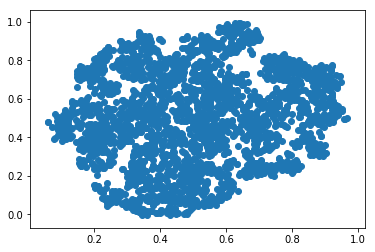

In [73]:
plt.scatter(plane_embs[:,0], plane_embs[:,1])

## Plotting 2-dimensinal representations of words on plane

In [0]:
import pylab 

In [75]:
pylab.figure(figsize = (100,100))
for i in range(plane_embs.shape[0]):
  #print(i)
  #print(plane_embs[i])
  pylab.annotate(ind_to_word[i], (plane_embs[i][0], plane_embs[i][1]))
pylab.savefig("emb.jpg")

NameError: ignored

<Figure size 7200x7200 with 0 Axes>